# TASCA SPRINT 11 - Practicant amb training i test sets

## NIVELL 1

### *Exercici 1*

Parteix el conjunt de dades DelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
retards_df = pd.read_csv('DelayedFlights.csv')

In [3]:
retards_df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
retards_df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

+ *Comprovades les variables que contenen null values, per tal de conservar el màxim d'observacions/dades que ofereix el 
   dataset; decideixo substituïr-los per la mean de cada una de les variables*

In [5]:
air_time_mean = retards_df['ArrTime'].mean()
retards_df['ArrTime'].fillna(air_time_mean, inplace=True)

In [6]:
retards_df['TailNum'].fillna(method ='pad', inplace = True)

In [7]:
aelaps_time_mean = retards_df['ActualElapsedTime'].mean()
retards_df['ActualElapsedTime'].fillna(air_time_mean, inplace=True)

In [8]:
crseelaps_time_mean = retards_df['CRSElapsedTime'].mean()
retards_df['CRSElapsedTime'].fillna(crseelaps_time_mean, inplace=True)

In [9]:
crseelaps_time_mean = retards_df['AirTime'].mean()
retards_df['AirTime'].fillna(crseelaps_time_mean, inplace=True)

In [10]:
arrdelay_time_mean = retards_df['ArrDelay'].mean()
retards_df['ArrDelay'].fillna(arrdelay_time_mean, inplace=True)

In [11]:
taxiin_time_mean = retards_df['TaxiIn'].mean()
retards_df['TaxiIn'].fillna(taxiin_time_mean, inplace=True)

In [12]:
taxiout_time_mean = retards_df['TaxiOut'].mean()
retards_df['TaxiOut'].fillna(taxiout_time_mean, inplace=True)

In [13]:
carrierdelay_time_mean = retards_df['CarrierDelay'].mean()
retards_df['CarrierDelay'].fillna(carrierdelay_time_mean, inplace=True)

In [14]:
weatherdelay_time_mean = retards_df['WeatherDelay'].mean()
retards_df['WeatherDelay'].fillna(weatherdelay_time_mean, inplace=True)

In [15]:
nasdelay_time_mean = retards_df['NASDelay'].mean()
retards_df['NASDelay'].fillna(nasdelay_time_mean, inplace=True)

In [16]:
securitydelay_time_mean = retards_df['SecurityDelay'].mean()
retards_df['SecurityDelay'].fillna(securitydelay_time_mean, inplace=True)

In [17]:
aircraftdelay_time_mean = retards_df['LateAircraftDelay'].mean()
retards_df['LateAircraftDelay'].fillna(aircraftdelay_time_mean, inplace=True)

In [18]:
retards_df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.000000,0.000000,0.000000,0.000000,32.000000
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.000000,0.000000,0.000000,0.000000,22.000000
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.000000,57.000000,18.000000,0.000000,0.000000
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.000000,0.000000,19.000000,0.000000,79.000000
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466


In [19]:
retards_df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

+ *I comprovo que ja no hi ha cap null value*

In [20]:
retards_df.isnull().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [21]:
retards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [22]:
retards_df['UniqueCarrier'].value_counts()

WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64

+ *El número tan gran d'observacions, deixa l'ordinador penjat quan després faig el model de train&test("Random Forest")*

  *Per tant, el primer que faig és fer un random sample __estratificat__, que sigui representatiu (no esbiaixat) del dataset
   original.I ja que vull fer un primer exemple de train&test amb Random Forest que predigui quina és el "UniqueCarrier",
   a partir de la resta de variables; aplico una funció lambda sobre "retards_df .groupby('UniqueCarrier', group_keys=False)"
   que em proporciona el que necessito*

In [23]:
# defineixo el sample size que vull
N = 500000

# genero una nou dataset amb el random sample estratificat
strat_sample_retards_df = retards_df .groupby('UniqueCarrier', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(retards_df))))).sample(frac=1).reset_index(drop=True)

In [24]:
strat_sample_retards_df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4768780,2008,8,7,4,1704.0,1533,2007.0,1828,AS,...,12.0,19.0,0,N,0,26.000000,0.000000,8.000000,0.000000,65.000000
1,1950068,2008,4,21,1,2000.0,1908,2140.0,2048,OH,...,5.0,20.0,0,N,0,52.000000,0.000000,0.000000,0.000000,0.000000
2,4339317,2008,8,11,1,1429.0,1220,1635.0,1438,XE,...,6.0,9.0,0,N,0,0.000000,0.000000,117.000000,0.000000,0.000000
3,3827211,2008,7,30,3,1110.0,1100,1216.0,1210,OO,...,3.0,14.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
4,3213756,2008,6,30,1,1414.0,1408,1446.0,1448,OO,...,5.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499997,5653366,2008,10,30,4,1714.0,1700,1811.0,1817,US,...,1.0,19.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
499998,6978625,2008,12,22,1,2047.0,2015,2342.0,2336,CO,...,5.0,24.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
499999,2735872,2008,5,18,7,1912.0,1845,2356.0,2324,F9,...,5.0,24.0,0,N,0,24.000000,0.000000,8.000000,0.000000,0.000000
500000,3135761,2008,6,15,7,1837.0,1440,1949.0,1559,YV,...,6.0,11.0,0,N,0,0.000000,0.000000,0.000000,0.000000,230.000000


+ *Em desfaig de les variables que no són numèriques i que per aquest exemple no necessito*

In [25]:
strat_sample_retards_df.drop(['TailNum', 'Origin', 'Dest','CancellationCode'], axis = 1, inplace = True)

+ *Trasllado la columna "UniqueCarrier" a la última posició per facilitar la definició de "X" i "y"*

In [26]:
s = strat_sample_retards_df.pop('UniqueCarrier')
new_retards_df = pd.concat([strat_sample_retards_df, s], 1)
new_retards_df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier
0,4768780,2008,8,7,4,1704.0,1533,2007.0,1828,635,...,12.0,19.0,0,0,26.000000,0.000000,8.000000,0.000000,65.000000,AS
1,1950068,2008,4,21,1,2000.0,1908,2140.0,2048,5212,...,5.0,20.0,0,0,52.000000,0.000000,0.000000,0.000000,0.000000,OH
2,4339317,2008,8,11,1,1429.0,1220,1635.0,1438,2650,...,6.0,9.0,0,0,0.000000,0.000000,117.000000,0.000000,0.000000,XE
3,3827211,2008,7,30,3,1110.0,1100,1216.0,1210,3617,...,3.0,14.0,0,0,19.179399,3.703571,15.021635,0.090137,25.296466,OO
4,3213756,2008,6,30,1,1414.0,1408,1446.0,1448,5933,...,5.0,10.0,0,0,19.179399,3.703571,15.021635,0.090137,25.296466,OO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499997,5653366,2008,10,30,4,1714.0,1700,1811.0,1817,2183,...,1.0,19.0,0,0,19.179399,3.703571,15.021635,0.090137,25.296466,US
499998,6978625,2008,12,22,1,2047.0,2015,2342.0,2336,1611,...,5.0,24.0,0,0,19.179399,3.703571,15.021635,0.090137,25.296466,CO
499999,2735872,2008,5,18,7,1912.0,1845,2356.0,2324,197,...,5.0,24.0,0,0,24.000000,0.000000,8.000000,0.000000,0.000000,F9
500000,3135761,2008,6,15,7,1837.0,1440,1949.0,1559,7253,...,6.0,11.0,0,0,0.000000,0.000000,0.000000,0.000000,230.000000,YV


+ *Comprovo amb ".value_counts()" que ha funcionat el ramdom sample estratificat*

    WN1 / WN0 = 0,2581 on WN1 = value_counts() del random sample estratificat i WN0 = value_counts() del dataset original
    
    AQ1 / AQ0 = 2,2586 on AQ1 = value_counts() del random sample estratificat i AQ0 = value_counts() del dataset original

In [27]:
new_retards_df['UniqueCarrier'].value_counts()

WN    97483
AA    49533
MQ    36639
UA    36511
OO    34189
DL    29492
XE    26762
CO    25867
US    25410
EV    21138
NW    20423
FL    18403
YV    17313
B6    14280
OH    13594
9E    13395
AS    10144
F9     7298
HA     1934
AQ      194
Name: UniqueCarrier, dtype: int64

+ *Confirmo el número de categories que conté la variable "UniqueCarrier" amb ".nunique()"*

In [28]:
new_retards_df['UniqueCarrier'].nunique()

20

+ *I ho visualitzo per tenir una idea gràfica de les dades de la columna Target*

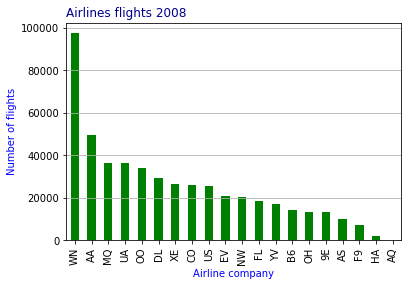

In [29]:
new_retards_df['UniqueCarrier'].value_counts().plot(kind='bar', color = 'g')
plt.title("Airlines flights 2008", color = 'Darkblue', loc = 'left')
plt.xlabel('Airline company', color = 'b')
plt.ylabel('Number of flights', color = 'b')
plt.grid(axis = 'y')

+ *__Sembla necessari sense dubte, aplicar un mètode d'estratificació per fer l'Split del dataset__*

In [30]:
X = new_retards_df.drop('UniqueCarrier', 1)
y = new_retards_df['UniqueCarrier']
print(X.shape, y.shape)

(500002, 25) (500002,)


In [31]:
print(y)

0         AS
1         OH
2         XE
3         OO
4         OO
          ..
499997    US
499998    CO
499999    F9
500000    YV
500001    WN
Name: UniqueCarrier, Length: 500002, dtype: object


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) # Paràmetre "stratify"

+ *Mirem el shape de cada sub dataset generat*

In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400001, 25) (100001, 25) (400001,) (100001,)


+ *I el resum estadistic de X_train i X_test

In [34]:
X_train.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,4.000010e+05,400001.0,400001.000000,400001.000000,400001.000000,400001.000000,400001.000000,400001.000000,400001.000000,400001.000000,...,400001.000000,400001.000000,400001.000000,400001.000000,400001.000000,400001.000000,400001.000000,400001.000000,400001.000000,400001.000000
mean,3.335759e+06,2008.0,6.101167,15.752568,3.985473,1518.081535,1466.561624,1610.469814,1633.666476,2185.649126,...,765.074727,6.807861,18.240679,0.000310,0.003930,19.169919,3.687203,14.995927,0.089134,25.269015
std,2.066317e+06,0.0,3.482750,8.774295,1.995091,449.917705,424.694905,546.010747,463.974699,1944.939969,...,574.406658,5.257051,14.391645,0.017604,0.062566,35.037087,16.912764,27.131968,1.504648,33.607140
min,1.500000e+01,2008.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.512218e+06,2008.0,3.000000,8.000000,2.000000,1203.000000,1135.000000,1318.000000,1325.000000,612.000000,...,338.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.240844e+06,2008.0,6.000000,16.000000,4.000000,1544.000000,1509.000000,1713.000000,1705.000000,1544.000000,...,606.000000,6.000000,14.000000,0.000000,0.000000,19.179399,0.000000,15.021635,0.000000,25.296466
75%,4.963998e+06,2008.0,9.000000,23.000000,6.000000,1900.000000,1815.000000,2030.000000,2014.000000,3422.000000,...,997.000000,8.000000,21.000000,0.000000,0.000000,19.179399,3.703571,15.021635,0.090137,25.296466
max,7.009718e+06,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,9740.000000,...,4962.000000,200.000000,364.000000,1.000000,1.000000,2436.000000,1148.000000,1357.000000,216.000000,1002.000000


In [35]:
X_test.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.000010e+05,100001.0,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,...,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000
mean,3.347813e+06,2008.0,6.121379,15.704733,3.986640,1520.680133,1469.213088,1610.187042,1636.240118,2182.271907,...,765.795482,6.827952,18.265266,0.000310,0.004400,19.187718,3.716909,15.005774,0.094479,25.281974
std,2.064369e+06,0.0,3.479165,8.777074,1.991924,449.769406,424.193728,548.162483,463.884136,1942.061401,...,572.355874,5.249790,14.208342,0.017604,0.066186,35.378160,17.731506,26.794702,1.970751,33.780677
min,4.000000e+00,2008.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.525339e+06,2008.0,3.000000,8.000000,2.000000,1205.000000,1135.000000,1318.000000,1325.000000,608.000000,...,338.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.248721e+06,2008.0,6.000000,16.000000,4.000000,1546.000000,1510.000000,1715.000000,1709.000000,1544.000000,...,611.000000,6.000000,14.000000,0.000000,0.000000,19.179399,0.000000,15.021635,0.000000,25.296466
75%,4.980657e+06,2008.0,9.000000,23.000000,6.000000,1901.000000,1818.000000,2029.000000,2015.000000,3421.000000,...,998.000000,8.000000,21.000000,0.000000,0.000000,19.179399,3.703571,15.021635,0.090137,25.296466
max,7.009710e+06,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,7829.000000,...,4962.000000,148.000000,319.000000,1.000000,1.000000,1186.000000,1153.000000,820.000000,357.000000,994.000000


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

+ *Definim el model amb que fer l'evaluació de l'algorisme de machine learning*

In [37]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

+ *I fem la predicció sobre X_test i calculem la "Accuracy"*

In [38]:
y_totest = model.predict(X_test)

acc = accuracy_score(y_test, y_totest)
print('Accuracy: %.3f' % acc)

Accuracy: 0.864


+ *__Prova sense la columna 0, que és un codi de les Airlines arbitrari, per veure si millora l'Accuracy__*

In [39]:
new_retards_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [40]:
new_retards_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier
0,2008,8,7,4,1704.0,1533,2007.0,1828,635,183.0,...,12.0,19.0,0,0,26.000000,0.000000,8.000000,0.000000,65.000000,AS
1,2008,4,21,1,2000.0,1908,2140.0,2048,5212,100.0,...,5.0,20.0,0,0,52.000000,0.000000,0.000000,0.000000,0.000000,OH
2,2008,8,11,1,1429.0,1220,1635.0,1438,2650,66.0,...,6.0,9.0,0,0,0.000000,0.000000,117.000000,0.000000,0.000000,XE
3,2008,7,30,3,1110.0,1100,1216.0,1210,3617,66.0,...,3.0,14.0,0,0,19.179399,3.703571,15.021635,0.090137,25.296466,OO
4,2008,6,30,1,1414.0,1408,1446.0,1448,5933,32.0,...,5.0,10.0,0,0,19.179399,3.703571,15.021635,0.090137,25.296466,OO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499997,2008,10,30,4,1714.0,1700,1811.0,1817,2183,57.0,...,1.0,19.0,0,0,19.179399,3.703571,15.021635,0.090137,25.296466,US
499998,2008,12,22,1,2047.0,2015,2342.0,2336,1611,235.0,...,5.0,24.0,0,0,19.179399,3.703571,15.021635,0.090137,25.296466,CO
499999,2008,5,18,7,1912.0,1845,2356.0,2324,197,164.0,...,5.0,24.0,0,0,24.000000,0.000000,8.000000,0.000000,0.000000,F9
500000,2008,6,15,7,1837.0,1440,1949.0,1559,7253,72.0,...,6.0,11.0,0,0,0.000000,0.000000,0.000000,0.000000,230.000000,YV


In [41]:
X = new_retards_df.drop('UniqueCarrier', 1)
y = new_retards_df['UniqueCarrier']
print(X.shape, y.shape)

(500002, 24) (500002,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) # Paràmetre "stratify"

In [43]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400001, 24) (100001, 24) (400001,) (100001,)


In [44]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [45]:
y_totest = model.predict(X_test)

acc = accuracy_score(y_test, y_totest)
print('Accuracy: %.3f' % acc)

Accuracy: 0.785


+ *__Doncs veiem que estava equivocat.L'Accuracy sense la columna "Unnamed 0" ha estat pitjor__*

+ *Em guardo en disc local el dataset sense null values que he treballat durant l'exercici i  poder-lo així
   tornar a importar-lo quan ho necessiti*

In [46]:
retards_df.to_csv('NewRetardsFlights.csv')
